# Implementação de Algorítimo Genético

Um algoritmo genético (AG) é uma técnica de busca utilizada na ciência da computação e em investigação operacional para achar soluções aproximadas em problemas de otimização e busca, fundamentado principalmente pelo americano John Henry Holland. Algoritmos genéticos são uma classe particular de algoritmos evolutivos que usam técnicas inspiradas pela biologia evolutiva como hereditariedade, mutação, seleção natural e recombinação (ou crossing over)[1]. Alguns exemplos do uso de AG incluem otimização de aprendizagem de árvore de decisão para melhor performance, resolução de algoritmo de sudoku[2], otimização de hiperparâmetros, e etc.

Abaixo temos uma implementeção de exemplo deste tipo de algorítmo desenvolvido em Python.

In [43]:
from random import *
from random import sample
import numpy as np
import time
import copy
import random 
import matplotlib.pyplot as plt

def leitura(arquivo):
    arq = open(arquivo, "r") # r- read
    lixo = arq.readline()  # linha com texto Number of jobs
    linha = arq.readline() # linha com número de tarefas
    N = int(linha)         # linha com o número de tarefas
    p = np.zeros(N)  # p = [p0, p1,..., p(N-1)]
    w = np.zeros(N)
    d = np.zeros(N)
    lixo = arq.readline()  # linha com texto Job data 
    for i in range(N):  # repetir N vezes
        # i-ésima linha
        linha = arq.readline().split()  # posições: 0-indice, 1-p, 2-w, 3-d
        p[i] = int(linha[1])
        w[i] = int(linha[2])
        d[i] = int(linha[3])
    return N, p, w, d  

def grafico(base_grafico, G):
    
    # definir eixos
    y = base_grafico
    x = list(range(G))
    
    #gerar gráfico
    plt.plot(x,y)
    
    #definir rótulos e título
    plt.ylabel('Tempo médio')
    plt.xlabel('Gerações')
    plt.title("Gráfico - Tempo Médio x Gerações")
    
def gerar_individuo(N):
    
    #Gerar lista aleatoria da ordem das tarefas
    lista_tarefas = sample(range(0, N),N)
    
    #Gerar o individuo
    individuo = [lista_tarefas, 0, 0]
    
    #retornar individuo
    return individuo

def inicializaPopulacao(TP, N):
    
    #Gerar variavel para armazenar os individuos
    populacao = []
    
    #loop para gerar a populacao
    for i in range(TP):
        
        #gerar individuo
        individuo = gerar_individuo(N)
        
        #adicionar individuo na populacao
        populacao.append(individuo)
        
    #retornar populacao
    return populacao

def funcao_objetivo(x, p, w, N, d):
    
    #gerar valor inicial da função objetivo
    valor_fo = 0
    
    #definir o M grande
    M = 10
    
    #loop para percorrer todas a tarefas 
    for i in range(N):
        calculo = w[i]*(x[i] + p[i]) - M*max(0,(x[i] + p[i] - d[i]))
        valor_fo = valor_fo + calculo
        
    #retornar valor da função objetivo
    return valor_fo 

def decodificar(lista_tarefas,p, N):
    
    #gerar uma lista inicial para receber os valores do tempo de inicio
    x = [0]*N
    
    #variavel para ir acumulando o tempo
    tempo_acumulado = 0
    
    #loop para avaliar todas as atividades
    for j in range(N):
        
        #se for a primeira tarefa, ela comecara no tempo zero
        if j == 0:
            tarefa = lista_tarefas[j]
            x[tarefa] = 0
            tempo_acumulado = int(p[tarefa])
            
        #se não for, a tarefa ira comecar no tempo acumulado
        else:
            tarefa = lista_tarefas[j]
            x[tarefa] = tempo_acumulado
            tempo_acumulado = tempo_acumulado + int(p[tarefa])
            
    #retornar x decodificado
    return x

def avalia_populacao(populacao, p, w, d, N):
    
    #loop para percorrer todos os individuos da populacao
    for i in range(len(populacao)):
        
        #pegar a lista de tarefas do individuo
        lista_tarefas = populacao[i][0]
        
        #realizar a decodificacao
        x = decodificar(lista_tarefas, p, N)
        
        #calcular o valor da função objetivo
        valor_fo = funcao_objetivo(x, p, w, N, d) 
        
        #adicionar valores ao inidividuo
        populacao[i][1] = x
        populacao[i][2] = valor_fo
        
    #retornar populacao
    return populacao

def torneioBinario(populacao, TP):
    
    #lista dos pais selecionados
    paisSelecionados = []
    
    #loop para selecionar os pais
    for i in range(TP):
        
        #selecão aleatória
        indAleat1 = random.randint(0, TP-1)
        indAleat2 = random.randint(0, TP-1)
                
        #se os dois pais selecionados forem o mesmo, selecionar novamente
        while (indAleat1 == indAleat2):
            indAleat2 = random.randint(0, TP-1)
            
        #selecionar o pai que apresenta o menor valor
        if (populacao[indAleat1][2] < populacao[indAleat2][2]):
            paiSelecionado = copy.deepcopy(populacao[indAleat1])
        else: 
            paiSelecionado = copy.deepcopy(populacao[indAleat2])

        #adicionar o pai a lista
        paisSelecionados.append(paiSelecionado)
        
        
    #retornar lista dos pais selecionados
    return paisSelecionados
        

def ajuste_filho(filho, N):
   
    #criar lista de tarefas e tarefas que ficaram de fora
    lista_tarefas = list(range(N))
    tarefa_de_fora = []
    
     #identificar a tarefa que ficou de fora e adicionar a lista
    for i in lista_tarefas:
        if ((lista_tarefas[i] in filho)) == False:
            tarefa_de_fora.append(lista_tarefas[i])
    
    #identificar a tarefa repetida e substituir pela tarefa que ficou de fora
    lista_tarefas = []
    for i in range(len(filho)):
        if (filho[i] in lista_tarefas) == False:
            lista_tarefas.append(filho[i])
        
        else:
            filho[i] = tarefa_de_fora[0]
            lista_tarefas.append(filho[i])
            del(tarefa_de_fora[0])
       
    #retornar filho ajustado
    return filho
    
    
def crossover(paisSelecionados, TP, N):

    #taxa de crossover
    PC = 0.95
    
    #lista vazia para geração dos filhos
    filhos = []
    
    #loop para 2 pais geram 2 filhos
    for i in range(TP//2): 
        
        #selecionar dois pais aleatoriamente na lista de pais selecionados
        doisPais = sample(paisSelecionados, 2)
        
        #gerar número aleatório entre 0 e 1
        aleatorio = random.random()
        
        #se o número for menor que o PC o crossover acontece
        if aleatorio <= PC:
            ponto = random.randint(1, N-1)
            filho1 = doisPais[0][0][:ponto] + doisPais[1][0][ponto:]
            filho2 = doisPais[1][0][:ponto] + doisPais[0][0][ponto:]
            

            
            #Ajuste dos filhos
            filho1 = ajuste_filho(filho1, N)
            filho2 = ajuste_filho(filho2, N)
            
            
        #caso seja maior, o filho terá o mesmo gene do pai
        else:
            filho1 = doisPais[0][0]
            filho2 = doisPais[1][0]

        #adicionar filhos a lista de filhos
        filhos.append([filho1, 0, 0])
        filhos.append([filho2, 0, 0])
        

    #retornar lista de filhos
    return filhos

def mutacao(filhos, N):

    #taxa de mutação
    PM = 0.1
    
    #loop para percorrer todos os filhos
    for i in range(len(filhos)):
        
        #loop para percorrer todas as tarefas de cada filho
        for b in range(N):
        
            #definir número aleatório entre 0 e 1
            aleatorio = random.random()
            
            #se o número aleatório for menor que o PM, a mutação acontece
            if aleatorio <= PM:
                
                #mutação por swap
                #selecionar dois pontos na lista de tarefas
                swap = sample(range(0, N),2)
                
                #pegar os números das tarefas
                troca_1 = swap[0]
                troca_2 = swap[1]
                
                #Realizar o swap
                valor_provisorio = filhos[i][0][troca_1]      
                filhos[i][0][troca_1] = filhos[i][0][troca_2]
                filhos[i][0][troca_2] = valor_provisorio

    #retornar filhos
    return filhos

def main(TP,G):
    
    # # constantes
    # TP = 10    # tamanho da população
    # G = 100     # número de gerações
    
    # caminho do arquivo das instâncias
    arquivo = "C:/Users/MeuNote/Desktop/Instâncias/Instancia10.txt"
    
    # obter os parâmetros das instâncias
    N, p, w, d = leitura(arquivo)
    
    # disparar o cronometro
    inicio = time.time()
    
    # gerar a populacação inicial 
    populacao = inicializaPopulacao(TP, N)
    
    # decodificar o xi e avaliar a populacão
    avalia_populacao(populacao, p, w, d, N)
    
    #armazenar informações para o relatório
    base_grafico = []
    melhores_cada_geracao = []
    
    # loop para executar as próximas gerações
    for g in range(G):
        
        # seleciona pares de pais aleatoriamente
        paisSelecionados = torneioBinario(populacao, TP)
        
        # realizar o crossover
        filhos = crossover(paisSelecionados, TP, N)
        
        # realizar a mutação
        mutacao(filhos, N)
        
        # decodificar o xi e avaliar os filhos
        avalia_populacao(filhos, p, w, d, N)
        
        # criar uma lista unificada de populacao e filhos
        mista = populacao + filhos
        
        # ordenar as listas pelo maior valor da função objetivo
        mistaOrd = sorted(mista, key=lambda tup: tup[2])
        
        # selecionar apenas os primeiros TP elementos para a próxima geração
        populacao = mistaOrd[:TP]
        
        # melhor de cada geracao
        melhores_cada_geracao.append(populacao[0][2])

        #Gerar informações sobre o tempo total da geração
        tempo_total = 0
        for individuo in populacao:
            tempo_total = individuo[2] + tempo_total
        
        # calcular o tempo médio da cada geração
        tempo_medio = tempo_total/TP   
        
        #adicionar a base de dados do gráfico
        base_grafico.append(tempo_medio)
        
    # para cronometro
    fim = time.time()
    
    #gerar relatório

    print("========== RELATÓRIO ===========")
    print("--------------------------------")
    print("Tamanho da População:", TP)
    print("Quantidade de Gerações:", G)
    print("Quantidade de Instâncias:", N)
    print("--------------------------------")
    print("Melhor individuo da primeira geração: ", str(melhores_cada_geracao[0]))
    print("Melhor individuo da última geração: ", str(melhores_cada_geracao[-1]))
    print("Diferença de desempenho: ", str(melhores_cada_geracao[0] - melhores_cada_geracao[-1]))
    print("--------------------------------")
    print("Média do tempo dos individuos da primeira geração: " + str(base_grafico[0]))
    print("Média do tempo dos indivíduos da última geração: " +  str(base_grafico[-1]))
    print("Diferença de desempenho: ", str(base_grafico[0] - base_grafico[-1]))
    print("--------------------------------")
    print("Tempo de execução (s): ", fim - inicio)

    
    #exibir gráfico
    grafico(base_grafico, G)

========== RELATÓRIO ===========
--------------------------------
Tamanho da População: 10
Quantidade de Gerações: 10
Quantidade de Instâncias: 10
--------------------------------
Melhor individuo da primeira geração:  714.0
Melhor individuo da última geração:  644.0
Diferença de desempenho:  70.0
--------------------------------
Média do tempo dos individuos da primeira geração: 746.0
Média do tempo dos indivíduos da última geração: 649.1
Diferença de desempenho:  96.89999999999998
--------------------------------
Tempo de execução (s):  0.013994455337524414


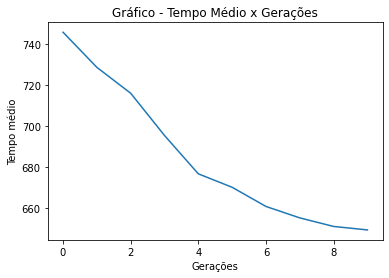

In [45]:
main(10,10)